In [1]:
pip install tensorflow kaggle matplotlib

In [2]:
import os
import kagglehub
import tensorflow as tf
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
path = kagglehub.dataset_download("tongpython/cat-and-dog")
print("Path to dataset files:", path)

100%|██████████| 218M/218M [00:01<00:00, 148MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1


In [4]:
dataset_path="/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1"

contents = os.listdir(dataset_path)
print(contents)

['test_set', 'training_set']


In [5]:
train_dir = "/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set"
test_dir = "/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/test_set"


In [6]:
img_size=(150,150)
batch_size=32

data preprocessing

In [7]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255

)

In [8]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
)

Found 8005 images belonging to 1 classes.


In [10]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size
)

Found 2023 images belonging to 1 classes.


pretrained vgg-16

In [11]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
base_model_trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
x=Flatten()(base_model.output)
x=Dense(256,activation="relu")(x)
x=Dropout(0.25)(x)
output=Dense(1,activation="relu")(x)


In [13]:
model=Model(base_model.input,output)

In [14]:
model.compile(optimizer=Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=['accuracy'])

In [15]:
history=model.fit(train_generator,validation_data=test_generator,epochs=10,batch_size=64)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 117s 350ms/step - accuracy: 0.9765 - loss: 0.3236 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 71s 281ms/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 71s 281ms/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 71s 281ms/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 71s 281ms/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 70s 280ms/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 74s 295ms/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 8/10
251/251 ━━━━━━━━━━━

In [16]:
#evaluate model
loss,accuracy=model.evaluate(test_generator)
print("validation accuracy:",accuracy)

64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 1.0000 - loss: 1.1921e-07
validation accuracy: 1.0


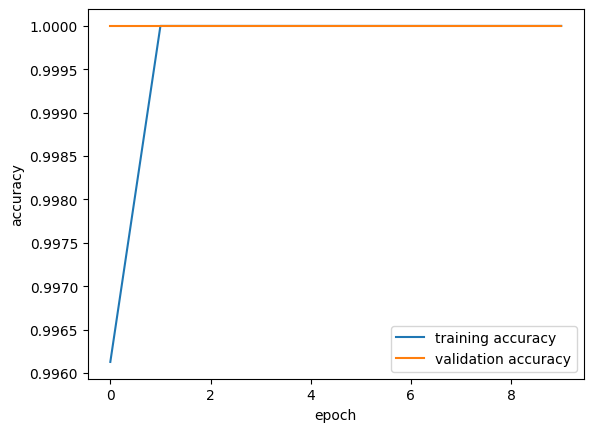

In [17]:
plt.plot(history.history['accuracy'],label="training accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")
plt.legend()
plt.xlabel("epoch")
plt.ylabel(("accuracy"))
plt.show()

Resnet50

In [18]:
base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(150,150,3))
base_model_trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
model=models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1,activation='sigmoid')
])

In [20]:
model.compile(optimizer=Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=['accuracy'])

In [21]:
h1=model.fit(train_generator,validation_data=test_generator,epochs=10,batch_size=64)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 144s 315ms/step - accuracy: 0.9932 - loss: 0.0158 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 48s 192ms/step - accuracy: 1.0000 - loss: 6.6784e-14 - val_accuracy: 1.0000 - val_loss: 2.7661e-20
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 48s 190ms/step - accuracy: 1.0000 - loss: 1.0409e-11 - val_accuracy: 1.0000 - val_loss: 2.7573e-10
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 83s 193ms/step - accuracy: 1.0000 - loss: 1.0033e-14 - val_accuracy: 1.0000 - val_loss: 4.1473e-17
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 47s 188ms/step - accuracy: 1.0000 - loss: 7.9195e-15 - val_accuracy: 1.0000 - val_loss: 6.9562e-18
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 48s 193ms/step - accuracy: 1.0000 - loss: 5.2606e-14 - val_accuracy: 1.0000 - val_loss: 2.9207e-18
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 49s 195ms/step - accuracy: 1.0000 - loss: 3.0701e-14 - val_accuracy: 1.0000 - val_loss: 7.3587e-18
Epoch 8/10
251/251 ━━━━━━━━━━━

In [22]:
loss,acc=model.evaluate(test_generator)
print("accuracy:",acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 1.0000 - loss: 1.2939e-17
accuracy: 1.0


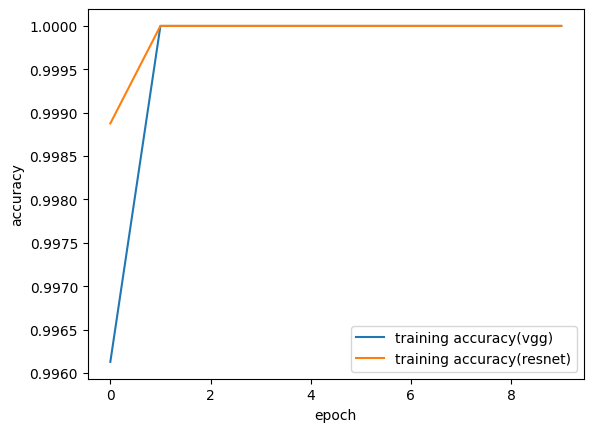

In [23]:
plt.plot(history.history['accuracy'],label="training accuracy(vgg)")
plt.plot(h1.history['accuracy'],label="training accuracy(resnet)")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [24]:
model.save("cat vs dog.h5")